# Inteligência Artificial: Clusterização
## Teste de Performance - TP3

### Questão 1
Aplique o DBSCAN para encontrar agrupamentos no dataset sintético make_circles.

Número de clusters encontrados: 2


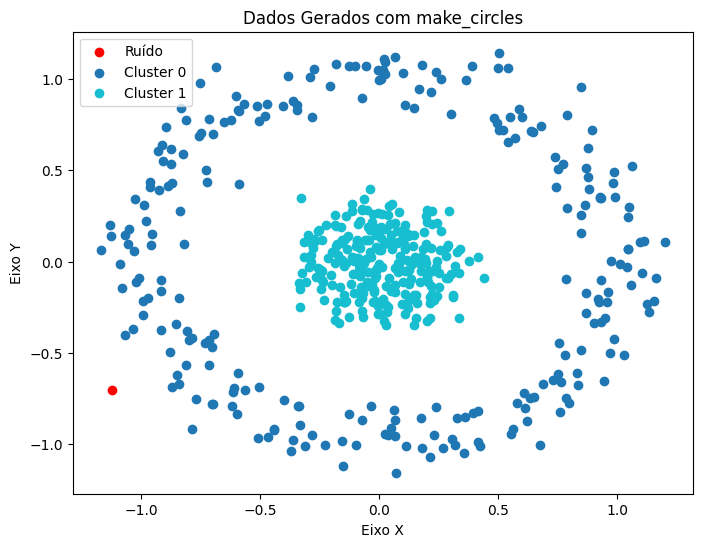

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

RANDOM_STATE = 11
features, target = make_circles(n_samples=500, noise=0.1, factor=0.2, random_state=RANDOM_STATE)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(features)

# Número de clusters encontrados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Visualizando os clusters
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))  # definindo uma paleta de cores
for n in range(-1, n_clusters):
    if n == -1:
        plt.scatter(features[clusters == n, 0], features[clusters == n, 1], color="red", label="Ruído")
    else:
        plt.scatter(features[clusters == n, 0], features[clusters == n, 1], color=colors[n], label=f"Cluster {n}")
plt.title("Dados Gerados com make_circles")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.legend()
plt.show()

### Questão 2
Aplicando as métricas usuais, avalie os resultados obtidos por você na questão anterior.

In [2]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Calculando o Silhouette Score
silhouette = silhouette_score(features, clusters)
print(f"Silhouette Score: {silhouette:.3f}")

# Calculando o Silhouette para cada cluster
sample_scores = silhouette_samples(features, clusters)
for cluster_id in set(clusters):
    if cluster_id != -1:  # Ignora ruído
        cluster_avg = sample_scores[clusters == cluster_id].mean()
        print(f"Cluster {cluster_id}: Silhouette médio = {cluster_avg:.3f}")

Silhouette Score: 0.204
Cluster 0: Silhouette médio = -0.292
Cluster 1: Silhouette médio = 0.699


### Questão 3
Execute testes de variações nos parâmetros eps e min_samples na sua implementação do DBSCAN na questão 1.

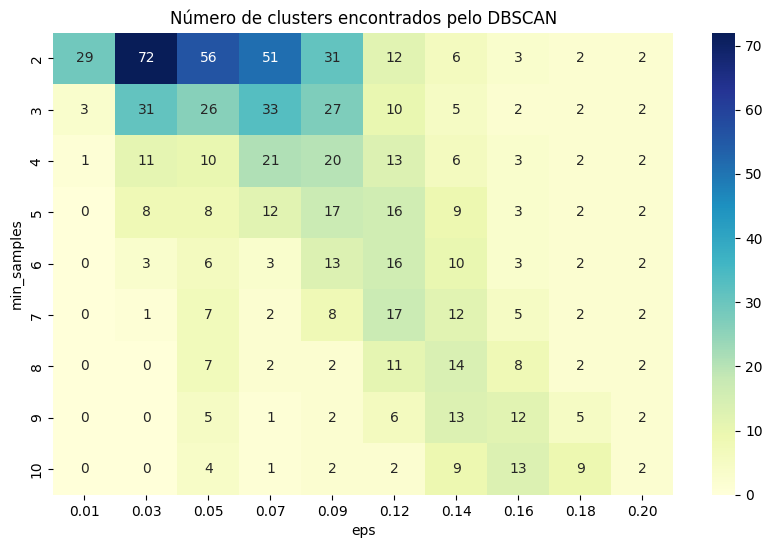

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import seaborn as sns

RANDOM_STATE = 11
features, target = make_circles(n_samples=500, noise=0.1, factor=0.2, random_state=RANDOM_STATE)

# Valores para eps e min_samples
eps_values = np.linspace(0.01, 0.2, 10)
min_samples_values = range(2, 11)

# Matriz para armazenar número de clusters
heatmap_matrix = np.zeros((len(min_samples_values), len(eps_values)))

# Testar combinações de eps e min_samples
for i, m in enumerate(min_samples_values):
    for j, e in enumerate(eps_values):
        dbscan = DBSCAN(eps=e, min_samples=m)
        clusters = dbscan.fit_predict(features)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        heatmap_matrix[i, j] = n_clusters

# Visualizando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_matrix, annot=True, fmt=".0f", xticklabels=[f"{e:.2f}" for e in eps_values], yticklabels=list(min_samples_values), cmap="YlGnBu")
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.title("Número de clusters encontrados pelo DBSCAN")
plt.show()

### Questão 4
Avalie os seus testes executados na questão 3, comparando os efeitos das variações nos parâmetros nos resultados obtidos pelo DBSCAN. Você pode usar um heatmap para essa demonstração.

Número de clusters encontrados: 13


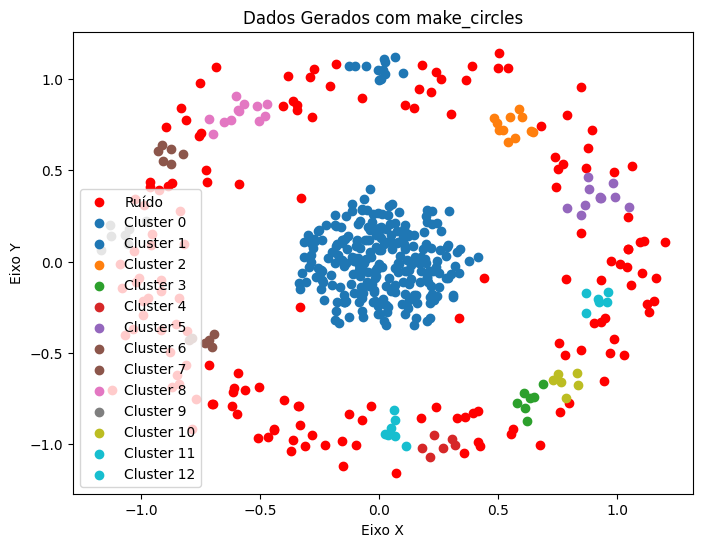

Silhouette Score: 0.170
Cluster 0: Silhouette médio = 0.569
Cluster 1: Silhouette médio = 0.839
Cluster 2: Silhouette médio = 0.804
Cluster 3: Silhouette médio = 0.482
Cluster 4: Silhouette médio = 0.568
Cluster 5: Silhouette médio = 0.760
Cluster 6: Silhouette médio = 0.904
Cluster 7: Silhouette médio = 0.804
Cluster 8: Silhouette médio = 0.641
Cluster 9: Silhouette médio = 0.767
Cluster 10: Silhouette médio = 0.543
Cluster 11: Silhouette médio = 0.580
Cluster 12: Silhouette médio = 0.835


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

RANDOM_STATE = 11
features, target = make_circles(n_samples=500, noise=0.1, factor=0.2, random_state=RANDOM_STATE)

# Aplicando DBSCAN para eps=0.09 e min_samples=6
dbscan = DBSCAN(eps=0.09, min_samples=6)
clusters = dbscan.fit_predict(features)

# Número de clusters encontrados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Visualizando os clusters
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))  # definindo uma paleta de cores
for n in range(-1, n_clusters):
    if n == -1:
        plt.scatter(features[clusters == n, 0], features[clusters == n, 1], color="red", label="Ruído")
    else:
        plt.scatter(features[clusters == n, 0], features[clusters == n, 1], color=colors[n], label=f"Cluster {n}")
plt.title("Dados Gerados com make_circles")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.legend()
plt.show()

# Calculando o Silhouette Score
silhouette = silhouette_score(features, clusters)
print(f"Silhouette Score: {silhouette:.3f}")

# Calculando o Silhouette para cada cluster
sample_scores = silhouette_samples(features, clusters)
for cluster_id in set(clusters):
    if cluster_id != -1:  # Ignora ruído
        cluster_avg = sample_scores[clusters == cluster_id].mean()
        print(f"Cluster {cluster_id}: Silhouette médio = {cluster_avg:.3f}")

### Questão 5
Aplique o DBSCAN para determinar agrupamentos no dataset Forest covertypes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

RANDOM_STATE = 11
covertypes = fetch_covtype()
features = covertypes.data

# Normalizando os dados e reduzindo a dimensionalidade
feature_scaled = StandardScaler().fit_transform(features)
feature_pca = PCA(n_components=2, random_state=RANDOM_STATE).fit_transform(feature_scaled)  # reduz para 2 dimensões

# Aplicando DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)
clusters = dbscan.fit_predict(feature_pca)

# Número de clusters encontrados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Visualizando os clusters
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))  # definindo uma paleta de cores
for n in range(-1, n_clusters):
    if n == -1:
        plt.scatter(features[clusters == n, 0], features[clusters == n, 1], color="red", label="Ruído")
    else:
        plt.scatter(features[clusters == n, 0], features[clusters == n, 1], color=colors[n], label=f"Cluster {n}")
plt.title("Dados Gerados com make_circles")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.legend()
plt.show()

### Questão 7
Aplique os algoritmos k-means e Agglometarive Clustering sobre o dataset sintético make_circles.

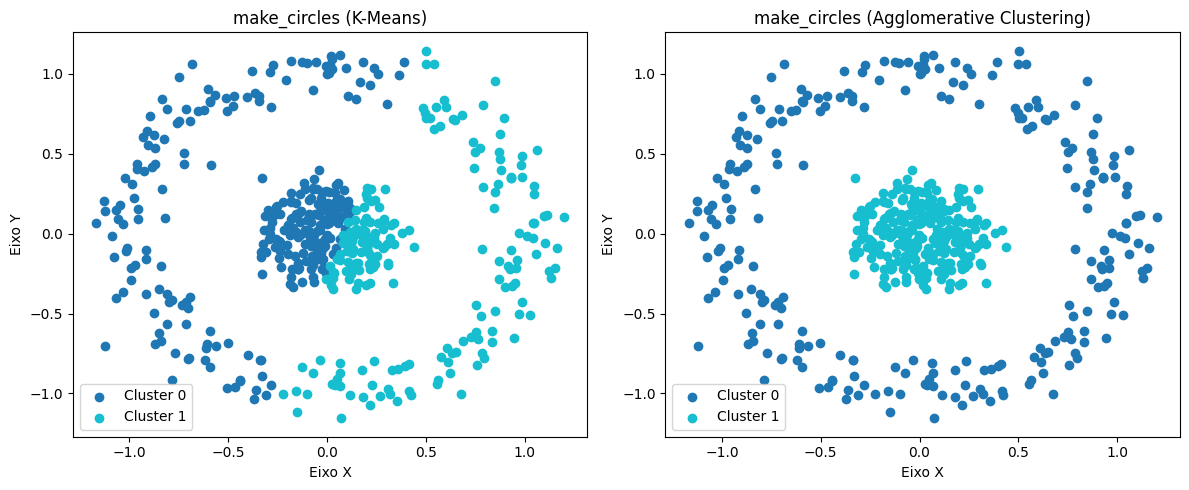

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering


RANDOM_STATE = 11
features, target = make_circles(n_samples=500, noise=0.1, factor=0.2, random_state=RANDOM_STATE)

# Aplicando K-Means
kmeans = KMeans(n_clusters=2, n_init=10, random_state=RANDOM_STATE)
clusters_km = kmeans.fit_predict(features)

# Aplicando Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage="single")
clusters_agg = agg.fit_predict(features)

# Visualizando os clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means
colors_km = plt.cm.tab10(np.linspace(0, 1, len(set(clusters_km))))
for n, color in zip(set(clusters_km), colors_km):
    axes[0].scatter(features[clusters_km == n, 0], features[clusters_km == n, 1], color=color, label=f"Cluster {n}")
axes[0].set_title("make_circles (K-Means)")
axes[0].set_xlabel("Eixo X")
axes[0].set_ylabel("Eixo Y")
axes[0].legend()

# Agglomerative Clustering
colors_agg = plt.cm.tab10(np.linspace(0, 1, len(set(clusters_agg))))
for n, color in zip(set(clusters_agg), colors_agg):
    axes[1].scatter(features[clusters_agg == n, 0], features[clusters_agg == n, 1], color=color, label=f"Cluster {n}")
axes[1].set_title("make_circles (Agglomerative Clustering)")
axes[1].set_xlabel("Eixo X")
axes[1].set_ylabel("Eixo Y")
axes[1].legend()
plt.tight_layout()
plt.show()


### Questão 8
Compare os resultados dos agrupamentos obtidos nas questões 1 e 7 usando as métricas ARI e NMI. Apresente os resultados.

In [6]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

RANDOM_STATE = 11
features, target = make_circles(n_samples=500, noise=0.1, factor=0.2, random_state=RANDOM_STATE)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters_db = dbscan.fit_predict(features)
ari_db = adjusted_rand_score(target, clusters_db)
nmi_db = normalized_mutual_info_score(target, clusters_db)
print(f"DBSCAN -> ARI: {ari_db:.3f}, NMI: {nmi_db:.3f}")

# Aplicando K-Means
kmeans = KMeans(n_clusters=2, n_init=10, random_state=RANDOM_STATE)
clusters_km = kmeans.fit_predict(features)
ari_km = adjusted_rand_score(target, clusters_km)
nmi_km = normalized_mutual_info_score(target, clusters_km)
print(f"K-Means -> ARI: {ari_km:.3f}, NMI: {nmi_km:.3f}")

# Aplicando Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage="single")
clusters_agg = agg.fit_predict(features)
ari_agg = adjusted_rand_score(target, clusters_agg)
nmi_agg = normalized_mutual_info_score(target, clusters_agg)
print(f"Agglomerative Clustering -> ARI: {ari_agg:.3f}, NMI: {nmi_agg:.3f}")

DBSCAN -> ARI: 0.996, NMI: 0.991
K-Means -> ARI: 0.012, NMI: 0.011
Agglomerative Clustering -> ARI: 1.000, NMI: 1.000


### Questão 9
Repita a avaliação proposta na questão 8 usando o silhouette coefficient. Apresente os resultados.

In [7]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

RANDOM_STATE = 11
features, target = make_circles(n_samples=500, noise=0.1, factor=0.2, random_state=RANDOM_STATE)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters_db = dbscan.fit_predict(features)
silhouette_db = silhouette_score(features, clusters_db)
print(f"DBSCAN -> Silhouette: {silhouette_db:.3f}")

# Aplicando K-Means
kmeans = KMeans(n_clusters=2, n_init=10, random_state=RANDOM_STATE)
clusters_km = kmeans.fit_predict(features)
silhouette_km = silhouette_score(features, clusters_km)
print(f"K-Means -> Silhouette: {silhouette_km:.3f}")

# Aplicando Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage="single")
clusters_agg = agg.fit_predict(features)
silhouette_agg = silhouette_score(features, clusters_agg)
print(f"Agglomerative Clustering -> Silhouette: {silhouette_agg:.3f}")

DBSCAN -> Silhouette: 0.204
K-Means -> Silhouette: 0.268
Agglomerative Clustering -> Silhouette: 0.243


### Questão 11
Aplique os algoritmos DBSCAN, k-means e Agglometarive Clustering sobre o dataset Olivetti faces. Apresente os resultados.

In [8]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

RANDOM_STATE = 11
faces = fetch_olivetti_faces()
features = faces.data
target = faces.target

# Normalizando os dados e reduzindo a dimensionalidade
features_scaled = StandardScaler().fit_transform(features)
features_pca = PCA(n_components=40, random_state=RANDOM_STATE).fit_transform(features_scaled)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
clusters_db = dbscan.fit_predict(features_pca)
ari_db = adjusted_rand_score(target, clusters_db)
nmi_db = normalized_mutual_info_score(target, clusters_db)
print(f"DBSCAN -> ARI: {ari_db:.3f}, NMI: {nmi_db:.3f}")

# Aplicando K-Means
kmeans = KMeans(n_clusters=40, n_init=10, random_state=RANDOM_STATE)
clusters_km = kmeans.fit_predict(features_pca)
ari_km = adjusted_rand_score(target, clusters_km)
nmi_km = normalized_mutual_info_score(target, clusters_km)
silhouette_km = silhouette_score(features_pca, clusters_km)
print(f"K-Means -> ARI: {ari_km:.3f}, NMI: {nmi_km:.3f}, Silhouette: {silhouette_km:.3f}")

# Aplicando Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=40, linkage="ward")
clusters_agg = agg.fit_predict(features_pca)
ari_agg = adjusted_rand_score(target, clusters_agg)
nmi_agg = normalized_mutual_info_score(target, clusters_agg)
silhouette_agg = silhouette_score(features_pca, clusters_agg)
print(f"Agglomerative Clustering -> ARI: {ari_agg:.3f}, NMI: {nmi_agg:.3f}, Silhouette: {silhouette_agg:.3f}")

DBSCAN -> ARI: 0.000, NMI: 0.000
K-Means -> ARI: 0.465, NMI: 0.787, Silhouette: 0.224
Agglomerative Clustering -> ARI: 0.500, NMI: 0.816, Silhouette: 0.238
